In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import intake,yaml
import intake_esm
from scipy import special
import keras
from keras.models import Model
from keras.layers import Dense, Input

In [2]:
def latest_version(cat):#this function gets the latest version of our catalog
    """
    input
    cat: esmdatastore
    output
    esmdatastore with latest DRS versions
    """
    latest_cat = cat.df.sort_values(by=['version','path']).drop_duplicates(['temporal subset','model','mip_table',
                                               'institute','variable','ensemble_member',
                                               'grid_label','experiment_id'],keep='last')
    return latest_cat


In [3]:
col_url = "https://cmip6-nc.s3.us-east-2.amazonaws.com/esgf-world.json" 
col = intake.open_esm_datastore(col_url)
esmcol_data = col.esmcol_data

In [4]:
model_name = 'GFDL-ESM4'

In [5]:
#mlotst, tos,uo,vo

In [6]:
#tos_ sea surface temperature
#area cello
#ofx ocean fixed
#omon  ocean monthly average 

In [7]:

query_Omon_tos = dict(experiment_id=['abrupt-4xCO2','1pctCO2','historical'],
                 mip_table=['Omon'],
                 ensemble_member=["r1i1p1f1","r1i1p1f2"],
                 model= model_name,
                 grid_label=['gn'],
                 variable=["tos"])
query_Ofx = dict(experiment_id=['abrupt-4xCO2','1pctCO2','historical'],
                 mip_table=['Ofx'],
                 #ensemble_member=["r1i1p1f1","r1i1p1f2"],
                 model= model_name,
                 grid_label=['gn'],
                 variable=["areacello"])

In [8]:
def pp_enso(ds):
    ds = ds.copy()   #the wrapper function makes a copy of the ds and works from this
    ds = rename_cmip6(ds)
    ds = fix_time(ds)
    #ds = fix_units(ds)
    #ds = correct_units(ds)
    return ds

In [9]:
cat_Omon_tos = col.search(**query_Omon_tos)
cat_Omon_tos_lat = latest_version(cat_Omon_tos)

cat_Omon_tos_latest = intake.open_esm_datastore(cat_Omon_tos_lat,esmcol_data=esmcol_data)

In [10]:
cat_Omon_tos_latest.df

project  institute      model experiment_id frequency modeling_realm  \
0    CMIP6  NOAA-GFDL  GFDL-ESM4       1pctCO2       mon          ocean   
1    CMIP6  NOAA-GFDL  GFDL-ESM4       1pctCO2       mon          ocean   
2    CMIP6  NOAA-GFDL  GFDL-ESM4       1pctCO2       mon          ocean   
3    CMIP6  NOAA-GFDL  GFDL-ESM4       1pctCO2       mon          ocean   
4    CMIP6  NOAA-GFDL  GFDL-ESM4       1pctCO2       mon          ocean   
5    CMIP6  NOAA-GFDL  GFDL-ESM4       1pctCO2       mon          ocean   
6    CMIP6  NOAA-GFDL  GFDL-ESM4       1pctCO2       mon          ocean   
7    CMIP6  NOAA-GFDL  GFDL-ESM4       1pctCO2       mon          ocean   
8    CMIP6  NOAA-GFDL  GFDL-ESM4  abrupt-4xCO2       mon          ocean   
9    CMIP6  NOAA-GFDL  GFDL-ESM4  abrupt-4xCO2       mon          ocean   
10   CMIP6  NOAA-GFDL  GFDL-ESM4  abrupt-4xCO2       mon          ocean   
11   CMIP6  NOAA-GFDL  GFDL-ESM4  abrupt-4xCO2       mon          ocean   
12   CMIP6  NOAA-GFDL  GFDL-ESM4  abrupt-4xCO2       mon          ocean   
13   CMIP6  NOAA-GFDL  GFDL-ESM4  abrupt-4xCO2       mon          ocean   
14   CMIP6  NOAA-GFDL  GFDL-ESM4  abrupt-4xCO2       mon          ocean   
15   CMIP6  NOAA-GFDL  GFDL-ESM4  abrupt-4xCO2       mon          ocean   
16   CMIP6  NOAA-GFDL  GFDL-ESM4    historical       mon          ocean   
17   CMIP6  NOAA-GFDL  GFDL-ESM4    historical       mon          ocean   
18   CMIP6  NOAA-GFDL  GFDL-ESM4    historical       mon          ocean   
19   CMIP6  NOAA-GFDL  GFDL-ESM4    historical       mon          ocean   
20   CMIP6  NOAA-GFDL  GFDL-ESM4    historical       mon          ocean   
21   CMIP6  NOAA-GFDL  GFDL-ESM4    historical       mon          ocean   
22   CMIP6  NOAA-GFDL  GFDL-ESM4    historical       mon          ocean   
23   CMIP6  NOAA-GFDL  GFDL-ESM4    historical       mon          ocean   
24   CMIP6  NOAA-GFDL  GFDL-ESM4    historical       mon          ocean   

   mip_table ensemble_member grid_label variable temporal subset    version  \
0       Omon        r1i1p1f1         gn      tos   000101-002012  v20180701   
1       Omon        r1i1p1f1         gn      tos   002101-004012  v20180701   
2       Omon        r1i1p1f1         gn      tos   004101-006012  v20180701   
3       Omon        r1i1p1f1         gn      tos   006101-008012  v20180701   
4       Omon        r1i1p1f1         gn      tos   008101-010012  v20180701   
5       Omon        r1i1p1f1         gn      tos   010101-012012  v20180701   
6       Omon        r1i1p1f1         gn      tos   012101-014012  v20180701   
7       Omon        r1i1p1f1         gn      tos   014101-015012  v20180701   
8       Omon        r1i1p1f1         gn      tos   000101-002012  v20180701   
9       Omon        r1i1p1f1         gn      tos   002101-004012  v20180701   
10      Omon        r1i1p1f1         gn      tos   004101-006012  v20180701   
11      Omon        r1i1p1f1         gn      tos   006101-008012  v20180701   
12      Omon        r1i1p1f1         gn      tos   008101-010012  v20180701   
13      Omon        r1i1p1f1         gn      tos   010101-012012  v20180701   
14      Omon        r1i1p1f1         gn      tos   012101-014012  v20180701   
15      Omon        r1i1p1f1         gn      tos   014101-015012  v20180701   
16      Omon        r1i1p1f1         gn      tos   185001-186912  v20190726   
17      Omon        r1i1p1f1         gn      tos   187001-188912  v20190726   
18      Omon        r1i1p1f1         gn      tos   189001-190912  v20190726   
19      Omon        r1i1p1f1         gn      tos   191001-192912  v20190726   
20      Omon        r1i1p1f1         gn      tos   193001-194912  v20190726   
21      Omon        r1i1p1f1         gn      tos   195001-196912  v20190726   
22      Omon        r1i1p1f1         gn      tos   197001-198912  v20190726   
23      Omon        r1i1p1f1         gn      tos   199001-200912  v20190726   
24      Omon        r1i1p1f1         gn      tos   201001-201412  v20190726  

In [11]:
cat_Ofx = col.search(**query_Ofx)
cat_Ofx_lat = latest_version(cat_Ofx)

cat_Ofx_latest = intake.open_esm_datastore(cat_Ofx_lat,esmcol_data=esmcol_data)

In [12]:
dict_Omon_tos = cat_Omon_tos_latest.to_dataset_dict(storage_options=dict(anon=True), cdf_kwargs={'decode_times': True,'chunks': {'time': 1}})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'project.institute.model.experiment_id.mip_table'


In [13]:
dict_Ofx = cat_Ofx_latest.to_dataset_dict(storage_options=dict(anon=True),cdf_kwargs={'decode_times': True,'chunks': {}})


--> The keys in the returned dictionary of datasets are constructed as follows:
	'project.institute.model.experiment_id.mip_table'


In [14]:
dict_Omon_tos.keys()

dict_keys(['CMIP6.NOAA-GFDL.GFDL-ESM4.abrupt-4xCO2.Omon', 'CMIP6.NOAA-GFDL.GFDL-ESM4.1pctCO2.Omon', 'CMIP6.NOAA-GFDL.GFDL-ESM4.historical.Omon'])

In [15]:
ds_Ofx = dict_Ofx["CMIP6.NOAA-GFDL.GFDL-ESM4.historical.Ofx"] #xarray dataset object to access Ofx areacello dataset used to calculate the weighted average

CALCULATING the summation of areacello

In [16]:
#TODO INSERT CELL SELECT region of interest in areacello
areacello_nino3 = ds_Ofx.areacello.sel(y = slice(-5,5), x = slice(-150,-90))

In [17]:
areacello_nino3

<xarray.DataArray 'areacello' (ensemble_member: 1, y: 39, x: 120)>
dask.array<getitem, shape=(1, 39, 120), dtype=float32, chunksize=(1, 39, 120), chunktype=numpy.ndarray>
Coordinates:
    lat              (y, x) float32 dask.array<chunksize=(39, 120), meta=np.ndarray>
    lon              (y, x) float32 dask.array<chunksize=(39, 120), meta=np.ndarray>
  * x                (x) float64 -149.8 -149.2 -148.8 ... -91.25 -90.75 -90.25
  * y                (y) float64 -4.872 -4.615 -4.359 ... 4.359 4.615 4.872
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'
Attributes:
    cell_methods:   area: sum
    long_name:      Grid-Cell Area
    standard_name:  cell_area
    units:          m2
    original_name:  areacello

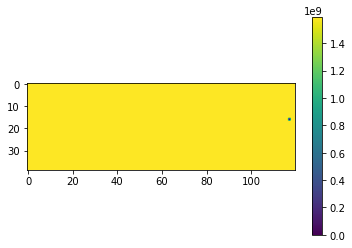

In [18]:
#areacello_nino3.isel(time=0).plot()
plt.imshow(areacello_nino3[0])
plt.colorbar()

In [19]:
#TODO 
#CALCULATE total_areacello, summation across lat,lon (in our dataset y,x respectively)

total_areacello = areacello_nino3.sum(dim=('x', 'y'))


NINO3 INDEX CALCULATION 

REGION 

(5S-5N , 150W-90W) 

SELECT tos and areacello for the region of interest

## Historical

In [20]:
ds_hist = dict_Omon_tos["CMIP6.NOAA-GFDL.GFDL-ESM4.historical.Omon"]


In [21]:
tm_his_st, tm_his_nd = '1980','2011'

In [22]:
ds_hist.time

<xarray.DataArray 'time' (time: 1980)>
array([cftime.DatetimeNoLeap(1850, 1, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 2, 15, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1850, 3, 16, 12, 0, 0, 0, has_year_zero=True),
       ...,
       cftime.DatetimeNoLeap(2014, 10, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 11, 16, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(2014, 12, 16, 12, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 1850-01-16 12:00:00 ... 2014-12-16 12:00:00
Attributes:
    long_name:      time
    axis:           T
    calendar_type:  noleap
    bounds:         time_bnds
    standard_name:  time
    description:    Temporal mean

In [23]:
#TODO INSERT CORRECT CODE TO SELECT SPECIFIED REGION (lat range and lon range) in TOS 
#tos = ds.tos......
tos_his = ds_hist.tos.sel(y = slice(-5,5), x = slice(-150,-90), time = slice(tm_his_st, tm_his_nd))
tos_his

<xarray.DataArray 'tos' (ensemble_member: 1, time: 384, y: 39, x: 120)>
dask.array<getitem, shape=(1, 384, 39, 120), dtype=float32, chunksize=(1, 1, 39, 120), chunktype=numpy.ndarray>
Coordinates:
    lat              (y, x) float32 dask.array<chunksize=(39, 120), meta=np.ndarray>
    lon              (y, x) float32 dask.array<chunksize=(39, 120), meta=np.ndarray>
  * time             (time) object 1980-01-16 12:00:00 ... 2011-12-16 12:00:00
  * x                (x) float64 -149.8 -149.2 -148.8 ... -91.25 -90.75 -90.25
  * y                (y) float64 -4.872 -4.615 -4.359 ... 4.359 4.615 4.872
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'
Attributes:
    long_name:      Sea Surface Temperature
    units:          degC
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello
    standard_name:  sea_surface_temperature
    original_name:  tos

CALCULATE SEA SURFACE TEMPERATURE WEIGHTED AVERAGE

In [26]:
tos_mean_nino3_his = (tos_his * areacello_nino3).sum(dim=('x', 'y')) / total_areacello
#nino3_index.plot()

In [27]:
tos_mean_nino3_his = tos_mean_nino3_his.compute()

In [28]:
tos_mean_nino3_his.size #1980 values, 1 value per month , 12 per year for 165 years

384

In [29]:
tos_mean_nino3_his.isel(time=0).compute()

<xarray.DataArray (ensemble_member: 1)>
array([23.493881], dtype=float32)
Coordinates:
    time             object 1980-01-16 12:00:00
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'

In [30]:
#datetimeindex = tos_mean_nino3_his.indexes['time'].to_datetimeindex()
#tos_mean_nino3_his['time'] = datetimeindex


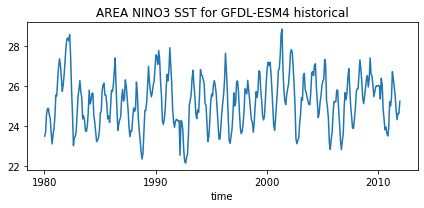

In [31]:
tos_mean_nino3_his.sel(time=slice(tm_his_st, tm_his_nd)).plot(aspect=2, size=3)
plt.title(f"AREA NINO3 SST for {model_name} historical")
plt.tight_layout()
plt.draw()
plt.savefig(f"{model_name}_SST_Hist_{tm_his_st}_{tm_his_nd}.png")

In [32]:
def ChunckMean(chunk, xArray, yrs):
    data = np.zeros((3, 240))
    years = yrs
    for i in range(0,3):
        Ds = xArray.tos.sel(y = slice(-5,5), x = slice(-150,-90), time = slice(years[2*i], years[2*i+1]))
        print (years[2*i],years[2*i+1])
        tos_mean = (Ds * areacello_nino3).sum(dim=('x', 'y')) / total_areacello
        tos_mean =  tos_mean.compute()
        print (tos_mean.shape)
        data[i] = np.array(tos_mean)
    return data

In [ ]:
three_years_his = ChunckMean(3, ds_hist, ["1952","1971","1972","1991","1992","2011"])

In [ ]:
three_years_his.shape

ADDITIONAL EXPLORATION

CLIMATOLOGY (average all Jans, Febs, etc) CALC EXAMPLES (YEARS NEED A TWEAK, calculate for 20 year chunks or as needed)

In [33]:
tos_nino3_climatology = tos_mean_nino3_his.sel(time=slice(tm_his_st, tm_his_nd)).groupby('time.month').mean(dim='time')


In [34]:
tos_nino3_climatology = tos_nino3_climatology.compute()

In [35]:
#tos_nino3_climatology.sum().plot()

In [36]:
tos_nino3_climatology

<xarray.DataArray (ensemble_member: 1, month: 12)>
array([[25.792765, 25.760628, 25.955544, 26.632011, 26.457462, 25.625278,
        24.961483, 24.196123, 23.960104, 24.169205, 24.449192, 25.143965]],
      dtype=float32)
Coordinates:
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'
  * month            (month) int64 1 2 3 4 5 6 7 8 9 10 11 12

In [37]:
print(tos_nino3_climatology)

<xarray.DataArray (ensemble_member: 1, month: 12)>
array([[25.792765, 25.760628, 25.955544, 26.632011, 26.457462, 25.625278,
        24.961483, 24.196123, 23.960104, 24.169205, 24.449192, 25.143965]],
      dtype=float32)
Coordinates:
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'
  * month            (month) int64 1 2 3 4 5 6 7 8 9 10 11 12


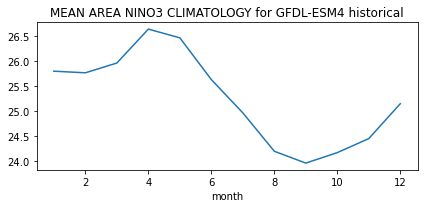

In [38]:
tos_nino3_climatology.plot(aspect=2, size=3)
plt.title(f"MEAN AREA NINO3 CLIMATOLOGY for {model_name} historical")
plt.tight_layout()
plt.draw()
plt.savefig(f"{model_name}_Clima_Hist_{tm_his_st}_{tm_his_nd}.png")

monthly anomaly of SST (or TOS here) over the Nino3 region

we subtract the monthly climatology values calculated above from the TOS value values and then do
a spatial average across the region of interest

In [39]:
tos_sel = tos_his.sel(time=slice(tm_his_st, tm_his_nd))
index_nino3 = (tos_sel.groupby('time.month')-tos_nino3_climatology).mean(dim=['x','y'])

In [40]:
tos_sel

<xarray.DataArray 'tos' (ensemble_member: 1, time: 384, y: 39, x: 120)>
dask.array<getitem, shape=(1, 384, 39, 120), dtype=float32, chunksize=(1, 1, 39, 120), chunktype=numpy.ndarray>
Coordinates:
    lat              (y, x) float32 dask.array<chunksize=(39, 120), meta=np.ndarray>
    lon              (y, x) float32 dask.array<chunksize=(39, 120), meta=np.ndarray>
  * time             (time) object 1980-01-16 12:00:00 ... 2011-12-16 12:00:00
  * x                (x) float64 -149.8 -149.2 -148.8 ... -91.25 -90.75 -90.25
  * y                (y) float64 -4.872 -4.615 -4.359 ... 4.359 4.615 4.872
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'
Attributes:
    long_name:      Sea Surface Temperature
    units:          degC
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello
    standard_name:  sea_surface_temperature
    original_name:  tos

In [41]:
index_nino3 = index_nino3.compute()

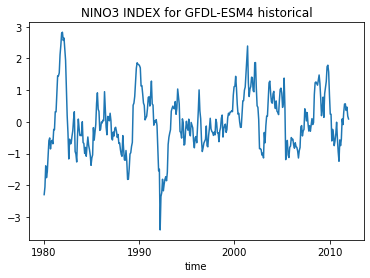

In [42]:
#datetimeindex = index_nino3.indexes['time'].to_datetimeindex()
#index_nino3['time'] = datetimeindex
index_nino3.plot()
plt.title(f"NINO3 INDEX for {model_name} historical")
plt.savefig(f"{model_name}_Nino3Idx_Hist_{tm_his_st}_{tm_his_nd}.png")

In [43]:
index_nino3.to_netcdf(f"{model_name}_SST_Anomaly_Historical{tm_his_st}_{tm_his_nd}.nc")

In [44]:
np.save("index_nino3_hist.npy", np.array(index_nino3))

#### RELATIVE SEA SURFACE TEMPERATURE (RSST)

The relative SST (RSST) is defined as: RSST = (NINO3-mean SST) - (tropical-mean SST)

In [45]:
#Selecting the tropical region, 20S-20N on areacello grid
areacello_tropics = ds_Ofx.areacello.sel(y = slice(-20,20))

#CALCULATE total_areacello, summation across lat,lon

total_areacello_tropics = areacello_tropics.sum(dim=('x', 'y'))

In [46]:
#Selecting the tropical region with a lat = 20S 20N and lon across the globe
tropics_hist = ds_hist.tos.sel(y = slice(-20,20), time = slice(tm_his_st, tm_his_nd))

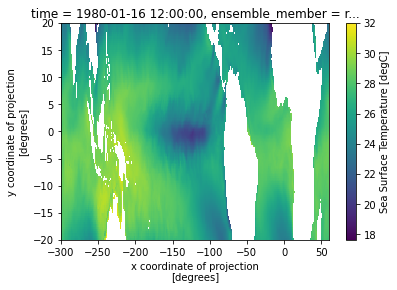

In [47]:
tropics_hist.isel(time=0).plot()


In [48]:
mean_tropics_his = (tropics_hist * areacello_tropics).sum(dim=('x', 'y')) / total_areacello_tropics

In [49]:
mean_tropics_his = mean_tropics_his.compute()

In [ ]:
tos_mean_nino3_his


In [ ]:
mean_tropics_his

In [52]:
RSST = tos_mean_nino3_his - mean_tropics_his


In [ ]:
RSST

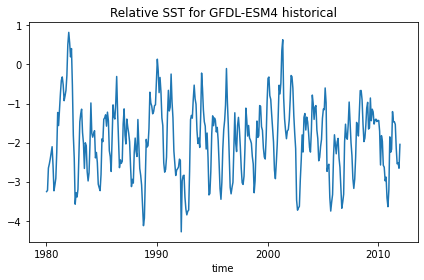

In [54]:
RSST.plot()
plt.title(f"Relative SST for {model_name} historical")
plt.tight_layout()
plt.draw()

In [55]:
rsst_climatology = RSST.groupby('time.month').mean(dim='time')

In [58]:
rsst_climatology = rsst_climatology.compute()
#rsst_climatology

In [59]:
print (rsst_climatology)

<xarray.DataArray (ensemble_member: 1, month: 12)>
array([[-1.2688135, -1.4745057, -1.595465 , -1.1905257, -1.3132042,
        -1.7056749, -1.8930068, -2.4135811, -2.7141745, -2.7351947,
        -2.6059318, -1.8951082]], dtype=float32)
Coordinates:
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'
  * month            (month) int64 1 2 3 4 5 6 7 8 9 10 11 12


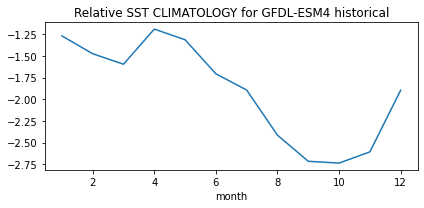

In [60]:
rsst_climatology.plot(aspect=2, size=3)
plt.title(f"Relative SST CLIMATOLOGY for {model_name} historical")
plt.tight_layout()
plt.draw()

## 1%CO2

In [56]:
ds_1pct = dict_Omon_tos["CMIP6.NOAA-GFDL.GFDL-ESM4.1pctCO2.Omon"]

In [57]:
ds_1pct.time.to_dataframe()

time
time                                    
0001-01-16 12:00:00  0001-01-16 12:00:00
0001-02-15 00:00:00  0001-02-15 00:00:00
0001-03-16 12:00:00  0001-03-16 12:00:00
0001-04-16 00:00:00  0001-04-16 00:00:00
0001-05-16 12:00:00  0001-05-16 12:00:00
...                                  ...
0150-08-16 12:00:00  0150-08-16 12:00:00
0150-09-16 00:00:00  0150-09-16 00:00:00
0150-10-16 12:00:00  0150-10-16 12:00:00
0150-11-16 00:00:00  0150-11-16 00:00:00
0150-12-16 12:00:00  0150-12-16 12:00:00

[1800 rows x 1 columns]

In [58]:
tm_1pct_st, tm_1pct_nd = "0119", "0150"


In [59]:
#TODO INSERT CORRECT CODE TO SELECT SPECIFIED REGION (lat range and lon range) in TOS 

tos_1pct = ds_1pct.tos.sel(y = slice(-5,5), x = slice(-150,-90), time = slice(tm_1pct_st, tm_1pct_nd))
#tos

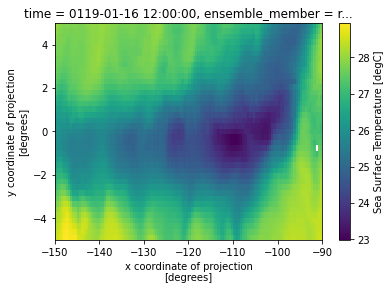

In [60]:
tos_1pct.isel(time=0).plot()

CALCULATE SEA SURFACE TEMPERATURE WEIGHTED AVERAGE

In [61]:
tos_mean_nino3_1pct = (tos_1pct * areacello_nino3).sum(dim=('x', 'y')) / total_areacello
#nino3_index.plot()

In [62]:
tos_mean_nino3_1pct = tos_mean_nino3_1pct.compute()

In [63]:
tos_mean_nino3_1pct.size

384

In [64]:
tos_mean_nino3_1pct.isel(time=0).compute()

<xarray.DataArray (ensemble_member: 1)>
array([26.335896], dtype=float32)
Coordinates:
    time             object 0119-01-16 12:00:00
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'

In [65]:
#datetimeindex_1pct = tos_mean_nino3_1pct.indexes['time'].to_datetimeindex()

In [66]:
#tos_mean_nino3_1pct['time'] = datetimeindex_1pct

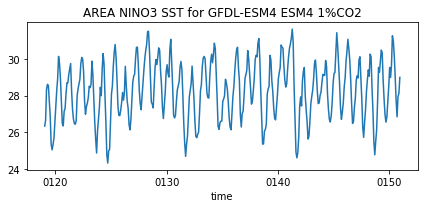

In [67]:
tos_mean_nino3_1pct.plot(aspect=2, size=3)
plt.title(f"AREA NINO3 SST for {model_name} ESM4 1%CO2")
plt.tight_layout()
plt.draw()
plt.savefig(f"{model_name}_1pctCo2_SST_{tm_1pct_st}_{tm_1pct_nd}.png")

In [68]:
three_years_1pct = ChunckMean(3, ds_1pct, [ '0091', '0110', '0111', '0130', '0131', '0150'])

0091 0110
(1, 240)
0111 0130
(1, 240)
0131 0150
(1, 240)


In [69]:
tos_nino3_climatology_1pct = tos_mean_nino3_1pct.groupby('time.month').mean(dim='time')


In [70]:
tos_nino3_climatology_1pct = tos_nino3_climatology_1pct.compute()

In [71]:
print (tos_nino3_climatology_1pct)

<xarray.DataArray (ensemble_member: 1, month: 12)>
array([[28.773232, 28.884361, 29.411827, 30.26133 , 30.045776, 28.99263 ,
        27.923262, 26.73307 , 26.314209, 26.721113, 27.273369, 28.126225]],
      dtype=float32)
Coordinates:
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'
  * month            (month) int64 1 2 3 4 5 6 7 8 9 10 11 12


In [72]:
#tos_nino3_climatology_1pct.isel(month=0).plot()

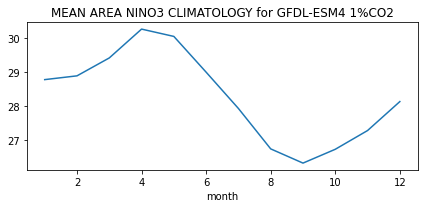

In [73]:
tos_nino3_climatology_1pct.plot(aspect=2, size=3)
plt.title(f"MEAN AREA NINO3 CLIMATOLOGY for {model_name} 1%CO2")
plt.tight_layout()
plt.draw()
plt.savefig(f"{model_name}_1pctCO2_Clima_{tm_1pct_st}_{tm_1pct_nd}.png")

monthly anomaly of SST (or TOS here) over the Nino3 region

we subtract the monthly climatology values calculated above from the TOS value values and then do
a spatial average across the region of interest

In [74]:
#tos_sel = tos_1pct.sel(time=slice('0119','0150'))
index_nino3_1pct = (tos_1pct.groupby('time.month')-tos_nino3_climatology_1pct).mean(dim=['x','y'])

In [75]:
index_nino3_1pct = index_nino3_1pct.compute()

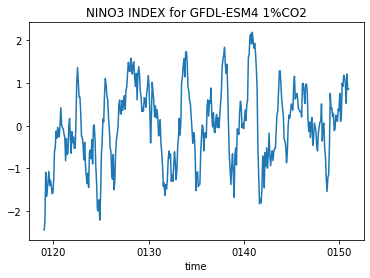

In [76]:
#datetimeindex = index_nino3.indexes['time'].to_datetimeindex()
#index_nino3['time'] = datetimeindex
index_nino3_1pct.plot()
plt.title(f"NINO3 INDEX for {model_name} 1%CO2")
plt.savefig(f"{model_name}_1pctCO2_Nino3Idx_{tm_1pct_st}_{tm_1pct_nd}.png")

In [77]:
np.save("index_nino3_1pct.npy", np.array(index_nino3_1pct))

In [110]:
#Selecting the tropical region with a lat = 20S 20N and lon across the globe
tropics_1pct = ds_1pct.tos.sel(y = slice(-20,20), time = slice(tm_1pct_st, tm_1pct_nd))

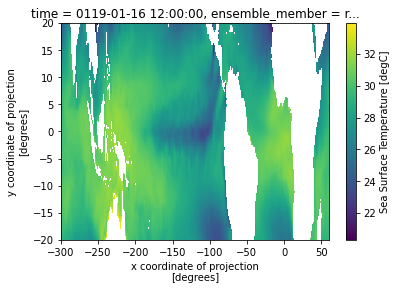

In [111]:
tropics_1pct.isel(time=0).plot()


In [113]:
mean_tropics_1pct = (tropics_1pct * areacello_tropics).sum(dim=('x', 'y')) / total_areacello_tropics

In [114]:
mean_tropics_1pct = mean_tropics_1pct.compute()

In [ ]:
tos_mean_nino3_his


In [ ]:
mean_tropics_his

In [115]:
RSST_1pct = tos_mean_nino3_1pct - mean_tropics_1pct


In [ ]:
RSST_1pct

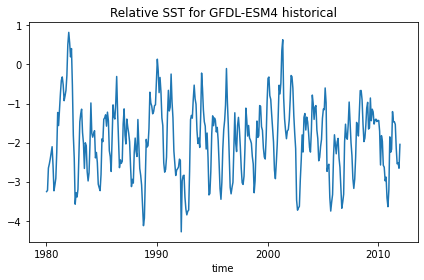

In [117]:
RSST.plot()
plt.title(f"Relative SST for {model_name} historical")
plt.tight_layout()
plt.draw()

In [118]:
rsst_climatology_1pct = RSST_1pct.groupby('time.month').mean(dim='time')

In [119]:
rsst_climatology_1pct = rsst_climatology_1pct.compute()
#rsst_climatology

In [120]:
print (rsst_climatology_1pct)

<xarray.DataArray (ensemble_member: 1, month: 12)>
array([[-0.6839991 , -0.7652205 , -0.5965323 , -0.03170925, -0.16790062,
        -0.7607428 , -1.295896  , -2.2044158 , -2.6171207 , -2.4546943 ,
        -2.1135802 , -1.3285255 ]], dtype=float32)
Coordinates:
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'
  * month            (month) int64 1 2 3 4 5 6 7 8 9 10 11 12


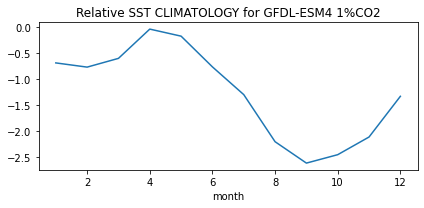

In [122]:
rsst_climatology_1pct.plot(aspect=2, size=3)
plt.title(f"Relative SST CLIMATOLOGY for {model_name} 1%CO2")
plt.tight_layout()
plt.draw()

## Abrupt-4xCO2

In [78]:
ds_4x = dict_Omon_tos["CMIP6.NOAA-GFDL.GFDL-ESM4.abrupt-4xCO2.Omon"]

In [79]:
ds_4x.time.to_dataframe()

time
time                                    
0001-01-16 12:00:00  0001-01-16 12:00:00
0001-02-15 00:00:00  0001-02-15 00:00:00
0001-03-16 12:00:00  0001-03-16 12:00:00
0001-04-16 00:00:00  0001-04-16 00:00:00
0001-05-16 12:00:00  0001-05-16 12:00:00
...                                  ...
0150-08-16 12:00:00  0150-08-16 12:00:00
0150-09-16 00:00:00  0150-09-16 00:00:00
0150-10-16 12:00:00  0150-10-16 12:00:00
0150-11-16 00:00:00  0150-11-16 00:00:00
0150-12-16 12:00:00  0150-12-16 12:00:00

[1800 rows x 1 columns]

In [80]:
tm_4x_st,tm_4x_nd = "0119", "0150"

In [81]:
#tos_4x = ds_4x.tos.sel(time = slice(tm_4x_st,tm_4x_nd))

In [82]:
#TODO INSERT CORRECT CODE TO SELECT SPECIFIED REGION (lat range and lon range) in TOS 
#tos = ds.tos......
tos_4x = ds_4x.tos.sel(y = slice(-5,5), x = slice(-150,-90), time = slice(tm_4x_st,tm_4x_nd) )
tos_4x

<xarray.DataArray 'tos' (ensemble_member: 1, time: 384, y: 39, x: 120)>
dask.array<getitem, shape=(1, 384, 39, 120), dtype=float32, chunksize=(1, 1, 39, 120), chunktype=numpy.ndarray>
Coordinates:
    lat              (y, x) float32 dask.array<chunksize=(39, 120), meta=np.ndarray>
    lon              (y, x) float32 dask.array<chunksize=(39, 120), meta=np.ndarray>
  * time             (time) object 0119-01-16 12:00:00 ... 0150-12-16 12:00:00
  * x                (x) float64 -149.8 -149.2 -148.8 ... -91.25 -90.75 -90.25
  * y                (y) float64 -4.872 -4.615 -4.359 ... 4.359 4.615 4.872
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'
Attributes:
    long_name:      Sea Surface Temperature
    units:          degC
    cell_methods:   area: mean where sea time: mean
    cell_measures:  area: areacello
    standard_name:  sea_surface_temperature
    original_name:  tos

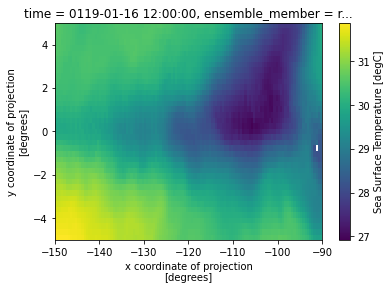

In [83]:
tos_4x.isel(time=0).plot()

CALCULATE SEA SURFACE TEMPERATURE WEIGHTED AVERAGE

In [84]:
tos_mean_nino3_4x = (tos_4x * areacello_nino3).sum(dim=('x', 'y')) / total_areacello
#nino3_index.plot()

In [85]:
tos_mean_nino3_4x = tos_mean_nino3_4x.compute()
#tos_mean_nino3_4x

In [86]:
tos_mean_nino3_4x.size #380 values, 1 value per month , 12 per year for 165 years
#it's 380 values because of time we selected for this simulation

384

In [87]:
tos_mean_nino3_4x.isel(time=0)

<xarray.DataArray (ensemble_member: 1)>
array([29.58265], dtype=float32)
Coordinates:
    time             object 0119-01-16 12:00:00
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'

In [88]:
#datetimeindex_4x = tos_mean_nino3_4x.indexes['time'].to_datetimeindex()
#tos_mean_nino3_4x['time'] = datetimeindex_4x


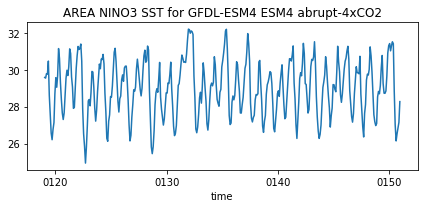

In [89]:
tos_mean_nino3_4x.plot(aspect=2, size=3)
plt.title(f"AREA NINO3 SST for {model_name} ESM4 abrupt-4xCO2")
plt.tight_layout()
plt.draw()
plt.savefig(f"{model_name}_4xCo2_SST_{tm_4x_st}_{tm_4x_nd}.png")

In [123]:
#Selecting the tropical region with a lat = 20S 20N and lon across the globe
tropics_4x = ds_4x.tos.sel(y = slice(-20,20), time = slice(tm_1pct_st, tm_1pct_nd))

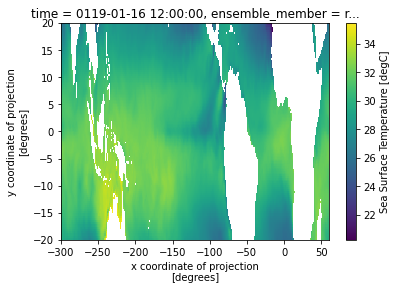

In [124]:
tropics_4x.isel(time=0).plot()


In [126]:
mean_tropics_4x = (tropics_4x * areacello_tropics).sum(dim=('x', 'y')) / total_areacello_tropics

In [127]:
mean_tropics_4x = mean_tropics_4x.compute()

In [ ]:
tos_mean_nino3_4x


In [ ]:
mean_tropics_4x

In [128]:
RSST_4x = tos_mean_nino3_4x - mean_tropics_4x


In [130]:
RSST_4x

<xarray.DataArray (ensemble_member: 1, time: 384)>
array([[-0.56747055, -0.69869614, -0.71494865, -0.8544674 , -0.13318634,
        -1.3818474 , -1.9330807 , -2.5927525 , -2.8854656 , -2.6666393 ,
        -2.4471912 , -1.1092606 , -0.2944851 , -0.96886826, -0.72995186,
         0.44258118,  0.0280056 , -0.9157486 , -1.2479    , -1.8296623 ,
        -2.2055397 , -2.1077728 , -1.4305973 , -0.5875721 , -0.24405098,
        -0.57328415, -0.4441414 ,  0.22525787,  0.20109367, -0.6724167 ,
        -0.75673103, -1.6182213 , -1.6788063 , -0.9269314 , -0.17176628,
         0.44890213,  0.82443047,  0.4495201 ,  0.24968338,  0.27744865,
        -0.4241352 , -2.3838997 , -3.1636963 , -3.529272  , -4.2894936 ,
        -3.645773  , -2.704193  , -1.3827591 , -1.279522  , -1.8808613 ,
        -1.377737  , -0.5134659 , -0.5990219 , -0.97512627, -1.5141869 ,
        -2.017479  , -1.5811653 , -1.0115032 , -0.5846386 ,  0.08708382,
        -0.1799488 ,  0.28931236, -0.01054001,  0.08028221, -0.32522583,
        -1.4076157 , -1.8997746 , -3.050188  , -3.2248898 , -2.3997765 ,
        -2.261198  , -1.2863617 , -1.2920055 , -0.92494583, -0.43725395,
         0.15693474,  0.44087029,  0.09412193, -0.4627781 , -1.1837521 ,
        -1.8226871 , -1.3517799 , -1.4451542 , -0.6814747 , -0.33566093,
        -0.9496918 , -0.39693832, -0.41412354, -0.37787437, -0.66586304,
        -1.2833824 , -2.361246  , -3.1420155 , -3.0723057 , -2.3058968 ,
        -1.750473  , -0.94400406, -1.1268826 , -1.254858  , -0.39944077,
...
        -0.11476707,  0.412529  , -0.51347923, -1.8583622 , -2.4360352 ,
        -2.8656044 , -3.1751728 , -3.1620998 , -2.8100338 , -1.8208656 ,
        -0.8940735 , -0.69169617, -0.7676773 , -0.08697701, -0.4043064 ,
        -0.9310837 , -1.2519054 , -1.5787067 , -2.6359463 , -2.3093414 ,
        -2.041029  , -0.84510803, -0.82022095, -1.1894684 , -1.5365982 ,
        -0.83560944,  0.4806347 ,  0.0975647 ,  0.04931259, -0.89512634,
        -1.3428688 , -1.1499882 , -0.754858  , -0.05429649,  0.17580605,
         0.16500854,  0.33578682,  0.40148544, -0.19153214, -1.4456654 ,
        -1.6274891 , -1.9964542 , -2.3337479 , -2.0890846 , -1.3239403 ,
        -0.57697105, -0.05860138, -0.42646027, -0.70833206, -0.9025593 ,
         0.10673904, -1.4181652 , -1.8030376 , -2.4189835 , -2.9666061 ,
        -2.0000973 , -1.8165379 , -0.6219044 , -0.32426643, -0.5483208 ,
        -0.55683327,  0.3231964 , -0.05478096, -0.4723034 , -1.041954  ,
        -1.9720955 , -2.355404  , -2.7330704 , -2.8014603 , -1.4525166 ,
        -1.1867504 , -1.3062477 , -1.1700268 , -0.5147171 ,  0.11142159,
        -0.89445114, -1.0424786 , -0.84807396, -0.76810646, -0.2939663 ,
         0.6382084 ,  0.9027386 ,  0.85551834,  0.2904911 ,  0.3709526 ,
         0.44552994,  0.42543602, -1.5666523 , -2.75239   , -3.270033  ,
        -3.0248775 , -2.8755054 , -2.75029   , -1.7127609 ]],
      dtype=float32)
Coordinates:
  * time             (time) object 0119-01-16 12:00:00 ... 0150-12-16 12:00:00
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'

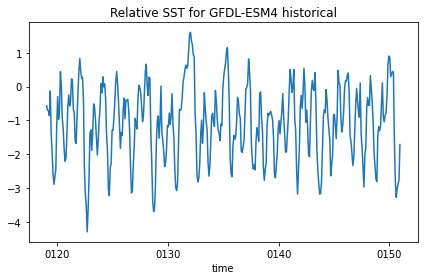

In [131]:
RSST_4x.plot()
plt.title(f"Relative SST for {model_name} historical")
plt.tight_layout()
plt.draw()

In [133]:
rsst_climatology_4x = RSST_4x.groupby('time.month').mean(dim='time')

In [134]:
rsst_climatology_4x = rsst_climatology_4x.compute()
#rsst_climatology

In [135]:
print (rsst_climatology_4x)

<xarray.DataArray (ensemble_member: 1, month: 12)>
array([[-0.4016679 , -0.5904846 , -0.5635446 , -0.08429867, -0.0231697 ,
        -0.88417333, -1.3196675 , -2.0216537 , -2.3614922 , -2.0831912 ,
        -1.6445946 , -0.7613544 ]], dtype=float32)
Coordinates:
  * ensemble_member  (ensemble_member) <U8 'r1i1p1f1'
  * month            (month) int64 1 2 3 4 5 6 7 8 9 10 11 12


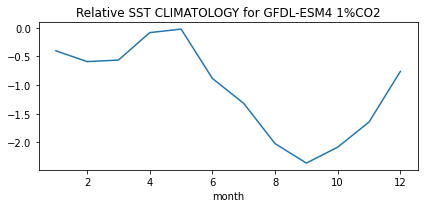

In [136]:
rsst_climatology_4x.plot(aspect=2, size=3)
plt.title(f"Relative SST CLIMATOLOGY for {model_name} 1%CO2")
plt.tight_layout()
plt.draw()

In [90]:
three_years_4x = ChunckMean(3, ds_4x, [ '0091', '0110', '0111', '0130', '0131', '0150'])

0091 0110
(1, 240)
0111 0130
(1, 240)
0131 0150
(1, 240)


In [91]:
#three_years

In [92]:
tos_nino3_climatology_4x = tos_mean_nino3_4x.groupby('time.month').mean(dim='time')


In [93]:
tos_nino3_climatology_4x = tos_nino3_climatology_4x.compute()


In [94]:
#tos_nino3_climatology_4x.isel(month=0).plot()

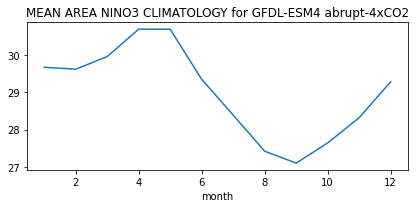

In [95]:
tos_nino3_climatology_4x.plot(aspect=2, size=3)
plt.title(f"MEAN AREA NINO3 CLIMATOLOGY for {model_name} abrupt-4xCO2")
plt.tight_layout()
plt.draw()
plt.savefig(f"{model_name}_4xCO2_Clima_{tm_1pct_st}_{tm_1pct_nd}.png")

monthly anomaly of SST (or TOS here) over the Nino3 region

we subtract the monthly climatology values calculated above from the TOS value values and then do
a spatial average across the region of interest

In [96]:
#tos_sel_4x = tos_4x.sel(time=slice('0119','0150'))
index_nino3_4x = (tos_4x.groupby('time.month')-tos_nino3_climatology_4x).mean(dim=['x','y'])

In [97]:
index_nino3_4x = index_nino3_4x.compute()

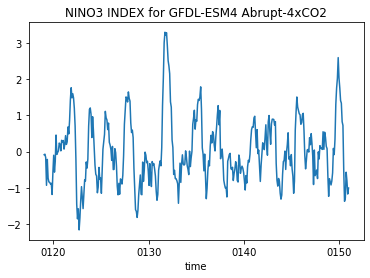

In [98]:
#datetimeindex = index_nino3.indexes['time'].to_datetimeindex()
#index_nino3['time'] = datetimeindex

index_nino3_4x.plot()
plt.title(f"NINO3 INDEX for {model_name} Abrupt-4xCO2")
plt.savefig(f"{model_name}_4xCO2_Nino3Idx_{tm_1pct_st}_{tm_1pct_nd}.png")

In [ ]:
np.save("index_nino3_4x.npy", np.array(index_nino3_4x))

In [ ]:
labels = ["chunk 1", "chunk 2", "chunk"]

In [ ]:
plt.figure(figsize=(8,6))
bplot1 = plt.boxplot([three_years[0], three_years[1], three_years[2]],
                      vert=True,  # vertical box alignment
                  patch_artist=True,# fill with color
                     widths = 0.5,
                labels=labels) 
bplot2 = plt.boxplot([three_years_1pct[0], three_years_1pct[1], three_years_1pct[2]],
                      vert =True,  # vertical box alignment
                  patch_artist=True,# fill with color
                     widths = 0.5,
                labels=labels)
bplot3 = plt.boxplot([three_years_4x[0], three_years_4x[1], three_years_4x[2]],
                      vert =True,  # vertical box alignment
                  patch_artist=True,# fill with color
                     widths = 0.5,
                labels=labels)
#plothis = plt.plot(labels, area_sum, '*', "green")

#plt.yscale('log')
#plt.ylim (9.0e+11, 6.0e+12)
#(['A simple line'])
colors = ['darkblue','green', 'pink', 'lightblue']
colors = ["blue", "blue", "blue", "blue"]
#for bplot in (bplot1, bplot2):
    #for patch, color in zip(bplot['boxes'], colors):
        #patch.set_facecolor(color)
for patch in bplot1["boxes"]:
    patch.set(facecolor = 'green')
for patch in bplot2["boxes"]:
    patch.set(facecolor = 'blue')
for patch in bplot3["boxes"]:
    patch.set(facecolor = 'red')
plt.title("StD of the 3 Means")
plt.legend([bplot1["boxes"][0], bplot2["boxes"][0], bplot3["boxes"][0]], ['Historical','1%CO'+'\N{SUBSCRIPT TWO}', '4xCO'+'\N{SUBSCRIPT TWO}'], loc='upper right')
plt.show()
#plt.ylim (9.0e+11, 7.0e+12)

/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/home/jovyan/my-conda-envs/enso_ml/lib/python3.9/site-packages/dask/array/numpy_compat.py:39: Runtim

Text(0, 0.5, 'lat')

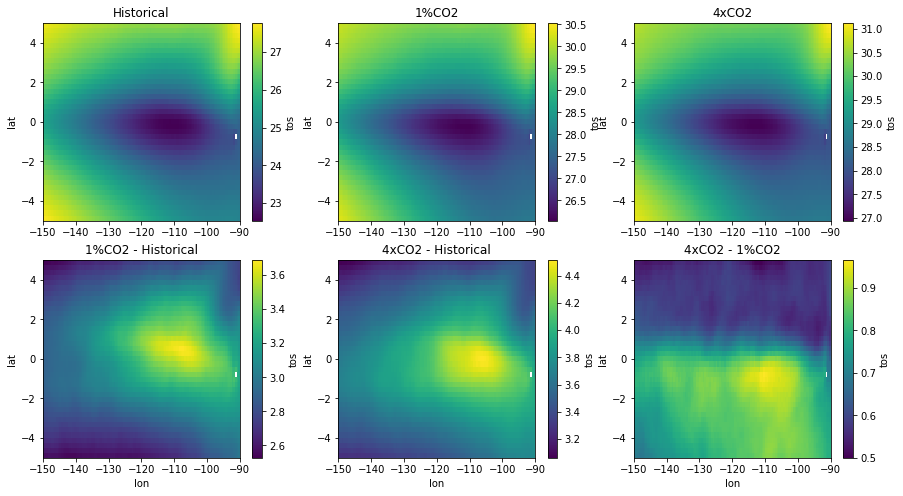

In [109]:
plt.figure(figsize=(15,8))
plt.subplot(2,3,1)
tos_his.mean(axis=1).plot()
plt.title("Historical")
plt.xlabel("")
plt.ylabel("lat")
plt.subplot(2,3,2)
tos_1pct.mean(axis=1).plot()
plt.title("1%CO2")
plt.xlabel("")
plt.ylabel("lat")
plt.subplot(2,3,3)
tos_4x.mean(axis=1).plot()
plt.title("4xCO2")
plt.xlabel("")
plt.ylabel("lat")
plt.subplot(2,3,4)
(tos_1pct.mean(axis=1)-tos_his.mean(axis=1)).plot()
plt.title("1%CO2 - Historical")
plt.xlabel("lon")
plt.ylabel("lat")
plt.subplot(2,3,5)
(tos_4x.mean(axis=1)-tos_his.mean(axis=1)).plot()
plt.title("4xCO2 - Historical")
plt.xlabel("lon")
plt.ylabel("lat")
plt.subplot(2,3,6)
(tos_4x.mean(axis=1)-tos_1pct.mean(axis=1)).plot()
plt.title("4xCO2 - 1%CO2")
plt.xlabel("lon")
plt.ylabel("lat")

FOR PRESENTATION

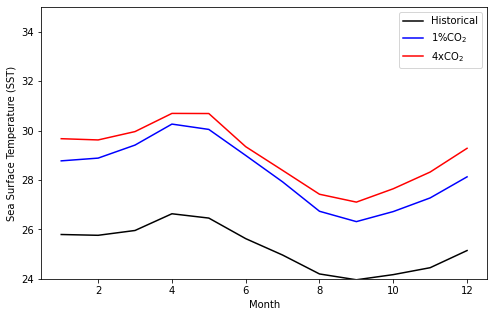

In [100]:
plt.figure(figsize=(8,5))
clima1  = tos_nino3_climatology.plot(color = "black", label = "Historical")
clima2 = tos_nino3_climatology_1pct.plot(color = "blue", label = r"1%CO$_2$")
clima3  = tos_nino3_climatology_4x.plot(color = "red", label = r"4xCO$_2$")
plt.ylim(24,35)
plt.xlabel("Month")
plt.ylabel ("Sea Surface Temperature (SST)")
plt.legend()
plt.title("")
plt.savefig(f"FINAL_PRESENT.png")
plt.show()

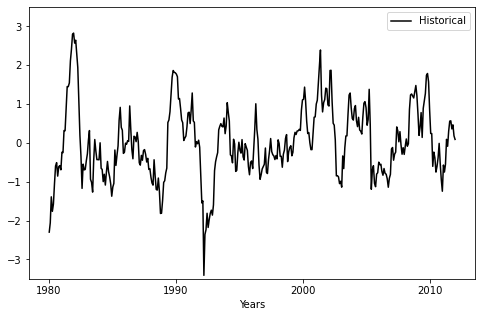

In [101]:
plt.figure(figsize=(8,5))
clima1  = index_nino3.plot(color = "black", label = "Historical")
plt.ylim(-3.5,3.5)
plt.xlabel("Years")
plt.legend()
plt.title("")
plt.savefig(f"FINAL_PRESENT.png")
plt.show()

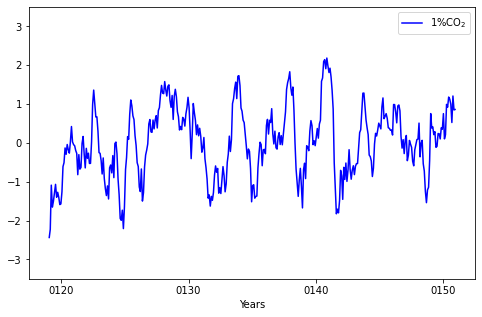

In [103]:
plt.figure(figsize=(8,5))
anoma2 = index_nino3_1pct.plot(color = "blue", label = r"1%CO$_2$")
plt.ylim(-3.5,3.5)
plt.xlabel("Years")
plt.legend()
plt.title("")
plt.savefig(f"FINAL_PRESENT.png")
plt.show()

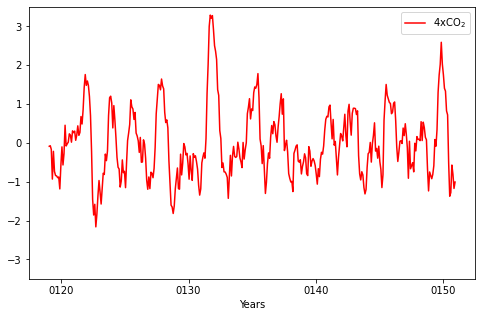

In [104]:
plt.figure(figsize=(8,5))
anoma2  = index_nino3_4x.plot(color = "red", label = r"4xCO$_2$")
plt.ylim(-3.5,3.5)
plt.xlabel("Years")
plt.legend()
plt.title("")
plt.savefig(f"FINAL_PRESENT.png")
plt.show()